In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Face Mask Dataset

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:05<00:00, 35.0MB/s]
100% 163M/163M [00:05<00:00, 31.1MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_594.jpg', 'with_mask_2974.jpg', 'with_mask_409.jpg', 'with_mask_3715.jpg', 'with_mask_375.jpg']
['with_mask_1080.jpg', 'with_mask_1159.jpg', 'with_mask_1091.jpg', 'with_mask_1097.jpg', 'with_mask_1982.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3748.jpg', 'without_mask_2493.jpg', 'without_mask_149.jpg', 'without_mask_948.jpg', 'without_mask_406.jpg']
['without_mask_1984.jpg', 'without_mask_3028.jpg', 'without_mask_41.jpg', 'without_mask_899.jpg', 'without_mask_850.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

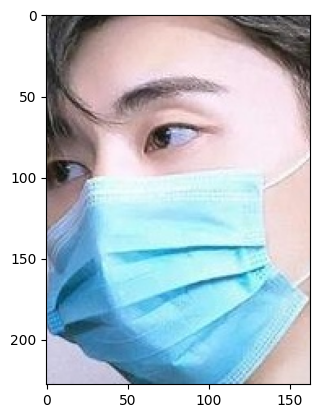

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

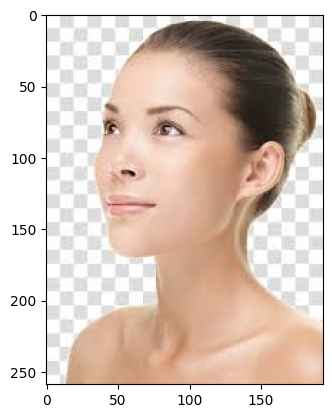

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)
len(data)

7553

array([[[218, 189, 171],
        [213, 184, 168],
        [201, 172, 158],
        ...,
        [ 23,  13,   4],
        [ 24,  14,   4],
        [ 24,  14,   4]],

       [[224, 195, 177],
        [224, 195, 179],
        [217, 188, 174],
        ...,
        [ 23,  13,   4],
        [ 24,  14,   4],
        [ 24,  14,   4]],

       [[223, 194, 176],
        [224, 195, 178],
        [218, 189, 174],
        ...,
        [ 23,  14,   5],
        [ 22,  14,   4],
        [ 22,  15,   3]],

       ...,

       [[236, 220, 168],
        [236, 220, 168],
        [236, 220, 169],
        ...,
        [154,  79,  33],
        [149,  77,  29],
        [147,  76,  28]],

       [[236, 219, 167],
        [237, 220, 168],
        [236, 220, 168],
        ...,
        [155,  81,  34],
        [151,  79,  31],
        [150,  78,  30]],

       [[236, 219, 167],
        [236, 219, 167],
        [237, 220, 168],
        ...,
        [155,  81,  34],
        [153,  81,  33],
        [152,  80,  32]]], dtype=uint8)
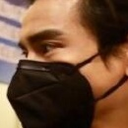

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
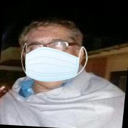

In [27]:
X_train[0]

In [28]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

Building a Convolutional Neural Networks (CNN)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9337 - loss: 0.1685
Test Accuracy = 0.9311714172363281


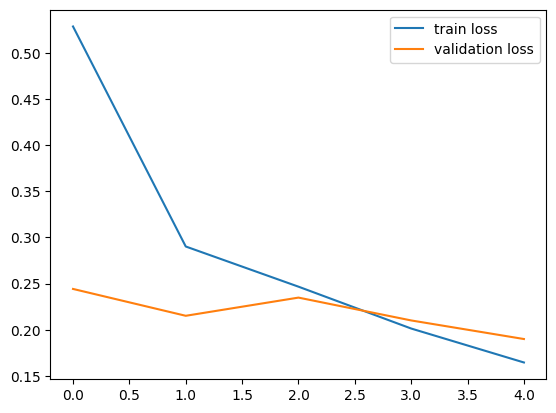

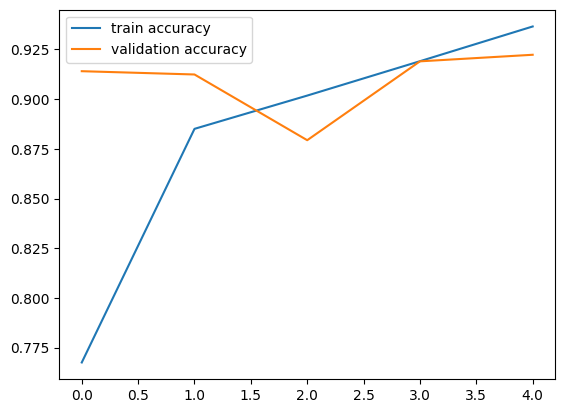

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


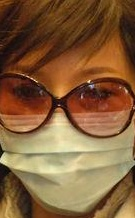

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
[[0.197368  0.8625353]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1018.jpg


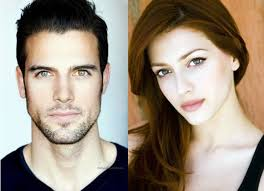

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.67354786 0.4463658 ]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')